KFold method 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('train_ctrUa4K.csv')
data_copy = data.copy()
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data_copy.replace(('Male', 'Female'), (1,0), inplace = True)
data_copy.replace(('Rural', 'Semiurban', 'Urban'), (1, 2,3), inplace = True)
data_copy.replace(('Yes', 'No'), (1, 0), inplace = True)
data_copy.replace(('Y', 'N'), (1,0), inplace = True)
data_copy.replace(('Graduate', 'Not Graduate'), (1,0), inplace = True)
data_copy.replace(('Male', 'Female'), (1,0), inplace = True)
data_copy['Dependents'] = np.where((data_copy.Dependents == '3+'), int('4'), data_copy.Dependents)
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1


In [4]:
data_copy.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data_copy['Gender'] = data_copy['Gender'].fillna(data_copy['Gender'].mode()[0])
data_copy['Married'] = data_copy['Married'].fillna(data_copy['Married'].mode()[0])
data_copy['Dependents'] = data_copy['Dependents'].fillna(data_copy['Dependents'].mode()[0])
data_copy['Self_Employed'] = data_copy['Self_Employed'].fillna(data_copy['Self_Employed'].mode()[0])
data_copy['ApplicantIncome'] = data_copy['ApplicantIncome'].fillna(data_copy['ApplicantIncome'].mean())
data_copy['CoapplicantIncome'] = data_copy['CoapplicantIncome'].fillna(data_copy['CoapplicantIncome'].mean())
data_copy['LoanAmount'] = data_copy['LoanAmount'].fillna(data_copy['LoanAmount'].mean())
data_copy['Loan_Amount_Term'] = data_copy['Loan_Amount_Term'].fillna(data_copy['Loan_Amount_Term'].mode()[0])
data_copy['Credit_History'] = data_copy['Credit_History'].fillna(data_copy['Credit_History'].mode()[0])
data_copy['Property_Area'] = data_copy['Property_Area'].fillna(data_copy['Property_Area'].mode()[0])
data_copy['Loan_Status'] = data_copy['Loan_Status'].fillna(data_copy['Loan_Status'].mode()[0])
data_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,3,1


In [6]:
data_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

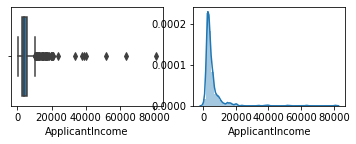

In [21]:
plt.subplot(2,2,1)
sns.boxplot(data['ApplicantIncome'])
plt.subplot(2,2,2)
sns.distplot(data['ApplicantIncome'])

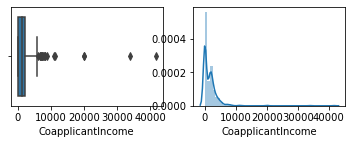

In [20]:
plt.subplot(2,2,1)
sns.boxplot(data['CoapplicantIncome'])
plt.subplot(2,2,2)
sns.distplot(data['CoapplicantIncome'])

In [8]:
data_copy['ApplicantIncome'] = np.log10(data_copy['ApplicantIncome'])
data_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,3.767082,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,3.661150,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1.0,1.0,0,1,1.0,3.477121,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,3.412124,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,3.778151,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,3.462398,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1.0,1.0,4,1,0.0,3.613419,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1.0,1.0,1,1,0.0,3.906981,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0.0,3.879841,0.0,187.000000,360.0,1.0,3,1


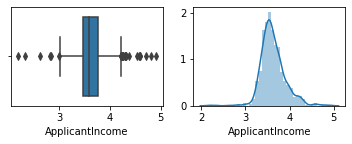

In [9]:
plt.subplot(2,2,1)
sns.boxplot(data_copy['ApplicantIncome'])
plt.subplot(2,2,2)
sns.distplot(data_copy['ApplicantIncome'])

In [10]:
X = data_copy[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = data_copy['Loan_Status']

In [11]:
logreg = LogisticRegression()
logreg_scores = []
kf = KFold()
for train_index, test_index in kf.split(data_copy):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    logreg.fit(X_train, y_train) 
    logreg_scores.append(logreg.score(X_test, y_test))
print(np.array(logreg_scores))   
print("Logistic Regression is ", np.mean(np.array(logreg_scores)))

[0.80487805 0.75609756 0.80487805 0.85365854 0.81147541]
Logistic Regression is  0.8061975209916034


c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [12]:
from sklearn.model_selection import StratifiedKFold
logreg = LogisticRegression()
logreg_scores = []
skf = StratifiedKFold()
for train_index, test_index in skf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    logreg.fit(X_train, y_train) 
    logreg_scores.append(logreg.score(X_test, y_test))
np.array(logreg_scores)   

c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

array([0.81300813, 0.76422764, 0.7804878 , 0.85365854, 0.81147541])

##This is one method to appply KFold , instead of this tedious method use cross_val_score which works same

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier()
dt_accuracy = np.mean(cross_val_score(decision_tree, X, y))
print(cross_val_score(decision_tree, X, y))
print('DEcision Tree  accuracy is ',dt_accuracy)

[0.67479675 0.6504065  0.71544715 0.77235772 0.7295082 ]
DEcision Tree  accuracy is  0.7084766093562576


In [14]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
cross_val_score(adaboost, X, y)
adaboost_accuracy = np.mean(cross_val_score(adaboost, X, y))
print(cross_val_score(adaboost, X, y))
print('AdaBoost accuracy is ', adaboost_accuracy)

[0.76422764 0.77235772 0.78861789 0.80487805 0.76229508]
AdaBoost accuracy is  0.7784752765560442


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
cross_val_score(gbc, X, y)
gbc_accuracy = np.mean(cross_val_score(gbc, X, y))
print(cross_val_score(gbc, X, y))
print('Gradient Boost  accuracy is ',gbc_accuracy)

[0.79674797 0.71544715 0.78861789 0.82926829 0.76229508]
Gradient Boost  accuracy is  0.775223244035719


In [16]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
cross_val_score(ranfor, X, y)
ranfor_accuracy = np.mean(cross_val_score(ranfor, X, y))
print(cross_val_score(ranfor, X, y))
print('Random Forest  accuracy is ',ranfor_accuracy)

[0.7804878  0.75609756 0.77235772 0.81300813 0.77868852]
Random Forest  accuracy is  0.783433293349327


Predictons using cross_val_predict

In [17]:
from sklearn.model_selection import cross_val_predict
y_predictions = cross_val_predict(ranfor, X, y)
y_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,